In [5]:
import pandas as pd
import glob
import os
import numpy as np
from matplotlib import pyplot
import seaborn as sns

In [6]:
RESULT_DIR = "./results/results_paper"

In [7]:
def get_latest_results_file(result_dir):    
    list_of_files = glob.glob(result_dir + '/*.csv') 
    latest_file = None
    if list_of_files:
        latest_file = max(list_of_files, key=os.path.getctime)
    return latest_file

In [8]:
results_file = get_latest_results_file(RESULT_DIR)
df = pd.read_csv(results_file)
display(df)

,dataset,optimizer,iteration,variation,runtime
0,FiftyWords,ssg-1000-1,20_804483522579198132,18.232746,1502.143077
1,FiftyWords,ssg-1000-1,8_1801549253948797108,18.232746,1502.562812
2,FiftyWords,ssg-1000-1,0_1767860767429554380,18.232746,1526.593798
3,FiftyWords,ssg-1000-1,13_2267724591939776716,18.232746,1526.797158
4,FiftyWords,adam-1000-1,7_1406635463577235664,46.877255,1530.292516
...,...,...,...,...,...
593,ChlorineConcentration,ssg-1000-10,19_1588405626369552459,17.691736,3227.863088
594,ChlorineConcentration,ssg-1000-10,20_1033697612110049360,17.691736,3228.438862
595,Coffee,ssg-1000-1,22_1767075716127338577,NaN,750.009480
596,ChlorineConcentration,ssg-1000-10,14_1993912661518921819,18.349075,3255.847110


In [9]:
df_filtered = df[(df.dataset != 'Coffee') & (df.dataset != 'ChlorineConcentration')]

In [10]:
df_grouped = df_filtered.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
display(df_grouped)

variation                 runtime             
                               mean        std         mean          std
dataset    optimizer                                                    
Adiac      adam-1000-1     0.602257   0.000000  1684.372908    90.199414
           adam-1000-10    0.776109   0.004588  1160.153429   607.181070
           ssg-1000-1      0.531567   0.000000  1645.142367   123.309864
           ssg-1000-10     0.758409   0.031887   728.499217   584.371622
Beef       adam-1000-1    36.868526   2.283190  6283.467312  2171.893574
           adam-1000-10  108.723722  98.970306  2583.867140  1342.541995
           ssg-1000-1     17.486746   0.516499  6764.518321  1634.447489
           ssg-1000-10    37.332470   8.508534  6481.521732  1791.095822
CBF        adam-1000-1    21.664727   0.566085   816.997664   216.605307
           adam-1000-10   27.633853   2.146396   575.936095   257.493762
           ssg-1000-1     18.165342   0.065243   852.743950    76.012494
           ssg-1000-10    21.423758   0.683021   620.472794   277.013595
FiftyWords adam-1000-1    46.877255   0.000000  3496.603552   543.728487
           adam-1000-10   61.167817  14.889046  2077.082178  1221.765866
           ssg-1000-1     18.232746   0.000000  3132.976341   747.154247
           ssg-1000-10    34.668304   0.162574  3200.217189   956.556043

In [11]:
df_variation = df_filtered.drop(columns=['runtime'])
df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])

variation           
                               mean        std
dataset    optimizer                          
Adiac      adam-1000-1     0.602257   0.000000
           adam-1000-10    0.776109   0.004588
           ssg-1000-1      0.531567   0.000000
           ssg-1000-10     0.758409   0.031887
Beef       adam-1000-1    36.868526   2.283190
           adam-1000-10  108.723722  98.970306
           ssg-1000-1     17.486746   0.516499
           ssg-1000-10    37.332470   8.508534
CBF        adam-1000-1    21.664727   0.566085
           adam-1000-10   27.633853   2.146396
           ssg-1000-1     18.165342   0.065243
           ssg-1000-10    21.423758   0.683021
FiftyWords adam-1000-1    46.877255   0.000000
           adam-1000-10   61.167817  14.889046
           ssg-1000-1     18.232746   0.000000
           ssg-1000-10    34.668304   0.162574

In [32]:
df_plot = df_variation.groupby(['dataset', 'optimizer']).agg(['mean', 'std'])
df_plot.columns = df_plot.columns.to_flat_index()
df_plot.reset_index(inplace=True)

df_plot = pd.melt(df_plot, id_vars=['dataset', 'optimizer'])
display(df_plot)

,dataset,optimizer,variable,value
0,Adiac,adam-1000-1,"(variation, mean)",0.602257
1,Adiac,adam-1000-10,"(variation, mean)",0.776109
2,Adiac,ssg-1000-1,"(variation, mean)",0.531567
3,Adiac,ssg-1000-10,"(variation, mean)",0.758409
4,Beef,adam-1000-1,"(variation, mean)",36.868526
5,Beef,adam-1000-10,"(variation, mean)",108.723722
6,Beef,ssg-1000-1,"(variation, mean)",17.486746
7,Beef,ssg-1000-10,"(variation, mean)",37.332470
8,CBF,adam-1000-1,"(variation, mean)",21.664727
9,CBF,adam-1000-10,"(variation, mean)",27.633853


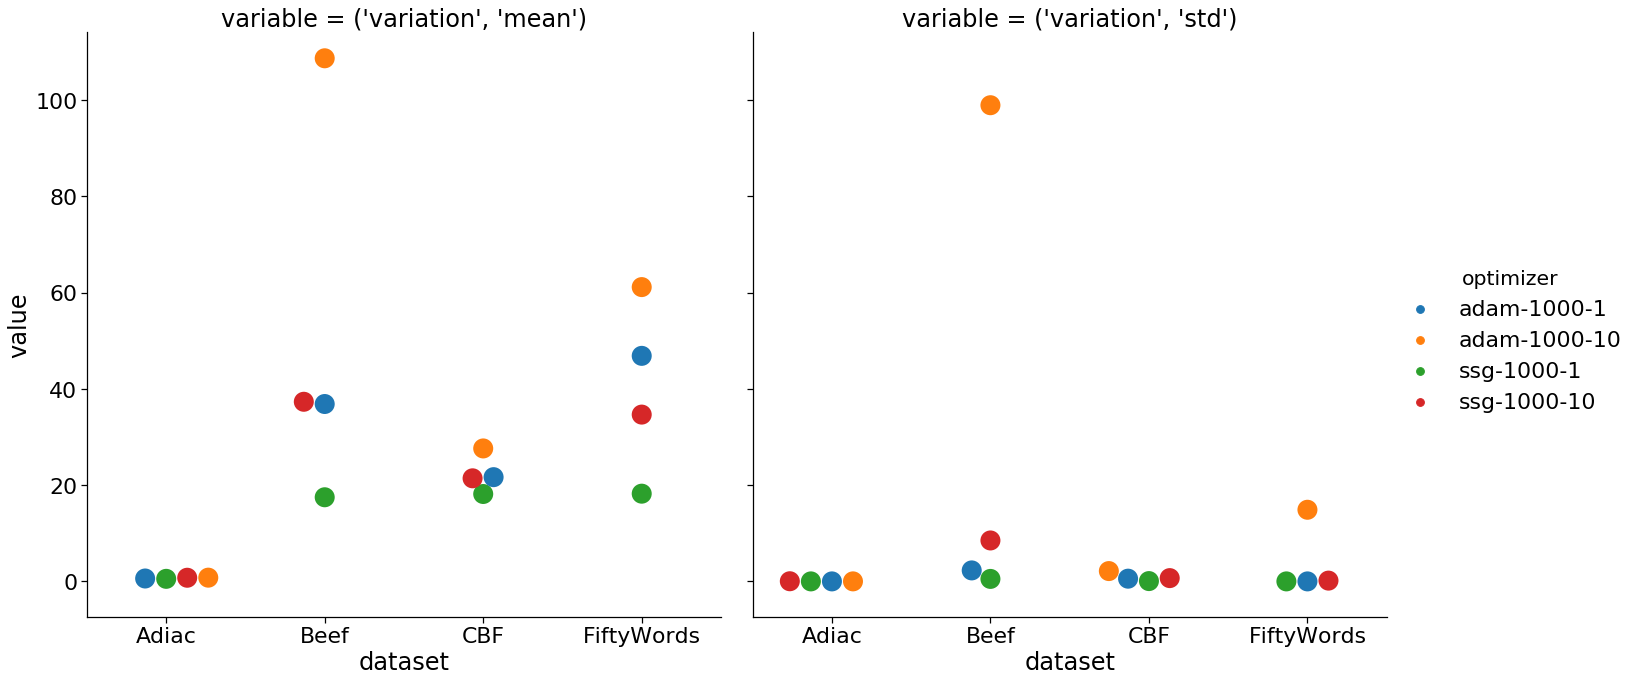

In [28]:
with sns.plotting_context('notebook', font_scale=2):
    sns.catplot(x='dataset', y='value', hue='optimizer', col='variable', data=df_plot, height=10, s=20, kind='swarm')

In [29]:
REFERENCE_FILE = "reference/5-sets_reference-results.csv"
df_r = pd.read_csv(REFERENCE_FILE)
df_r.groupby(['dataset']).mean()

,mean,std
dataset,,
Adiac,0.588,0.0140
Beef,23.830,3.4000
CBF,19.300,0.5940
ChlorineConcentration,15.396,0.5420
FiftyWords,21.382,1.7676


In [30]:
df.groupby(['dataset', 'optimizer']).count()

iteration  variation  runtime
dataset               optimizer                                  
Adiac                 adam-1000-1          30         30       30
                      adam-1000-10         30         30       30
                      ssg-1000-1           30         30       30
                      ssg-1000-10          30         30       30
Beef                  adam-1000-1          30         30       30
                      adam-1000-10         30         30       30
                      ssg-1000-1           30         30       30
                      ssg-1000-10          30         30       30
CBF                   adam-1000-1          30         30       30
                      adam-1000-10         30         30       30
                      ssg-1000-1           30         30       30
                      ssg-1000-10          30         30       30
ChlorineConcentration adam-1000-1          30         30       30
                      adam-1000-10         29         29       29
                      ssg-1000-1           30         30       30
                      ssg-1000-10          28         28       28
Coffee                ssg-1000-1            1          0        1
FiftyWords            adam-1000-1          30         30       30
                      adam-1000-10         30         30       30
                      ssg-1000-1           30         30       30
                      ssg-1000-10          30         30       30

In [31]:
df['variation_sign'] = np.sign(df.variation)
df.groupby(['dataset', 'optimizer']).variation_sign.value_counts().unstack()

variation_sign                      1.0
dataset               optimizer        
Adiac                 adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
Beef                  adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
CBF                   adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30
ChlorineConcentration adam-1000-1    30
                      adam-1000-10   29
                      ssg-1000-1     30
                      ssg-1000-10    28
FiftyWords            adam-1000-1    30
                      adam-1000-10   30
                      ssg-1000-1     30
                      ssg-1000-10    30